### Decision Tree
A flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. Root node learns to partition on the basis of the attribute value.
#### How it works?
<ol>
    <li>Select the best attribute using Attribute Selection Measures(ASM) to split the records.</li>
    <li>Make that attribute a decision node and breaks the dataset into smaller subsets.</li>
    <li>Starts tree building by repeating this process recursively for each child until one of the condition will match:
        <ul>
            <li>All the tuples belong to the same attribute value.</li>
            <li>There are no more remaining attributes.</li>
            <li>There are no more instances.</li>
        </ul>
    </li>
</ol>

#### Attribute Selection Measures(ASM)
It is a heuristic for selecting the splitting criterion that partition data into the best possible manner. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute. Most popular selection measures are Information Gain and Gini Index.
<ul>
    <li>Information Gain
        <ul>
            <li>Entropy refered to the impurity(the state of not pure) in a group of examples.</li>
            <li>Information gain is the decrease in entropy. It computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.<br>
            <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/3_tvqfga.png">
            Pi is the probability that an arbitrary tuple in D belongs to class Ci.
            <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/4_vvrzww.png">
            <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/5_trlrj8.png">
                <ul>
                    <li>Info(D) is the average amount of information needed to identify the class label of a tuple in D.</li>
                    <li>|Dj|/|D| acts as the weight of the jth partition.</li>
                    <li>InfoA(D) is the expected informa-tion required to classify a tuple from D based on the partitioning by A.</li>
                </ul>
            </li>
            <li><b>The attribute A with the highest information gain, Gain(A), is chosen as the splitting attribute at node N().</b></li>
        </ul>
    </li>
    <li>Gini Index
        <ul>
            <li>Use Gini Method
                <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/8_k4ia8r.png">
            </li>
            <li>
                The Gini Index considers a binary split for each attribute. You can compute a weighted sum of the impurity of each partition. If a binary split on attribute A partitions data D into D1 and D2, the Gini index of D is:
                <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934191/9_atnmbc.png">
            </li>
            <li><b>The attribute with minimum Gini index is chosen as the splitting attribute.</b>
                <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934191/10_oqzzp6.png">
            </li>
        </ul>
    </li>
</ul>

### Load libraries

In [1]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Load data

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv")

pima.columns = col_names

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature Selection
Divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

#### Splitting Data
Split dataset into training set and test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#### Building Decision Tree Model
Using Gini-Index

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluating Model

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


#### Visualize Data

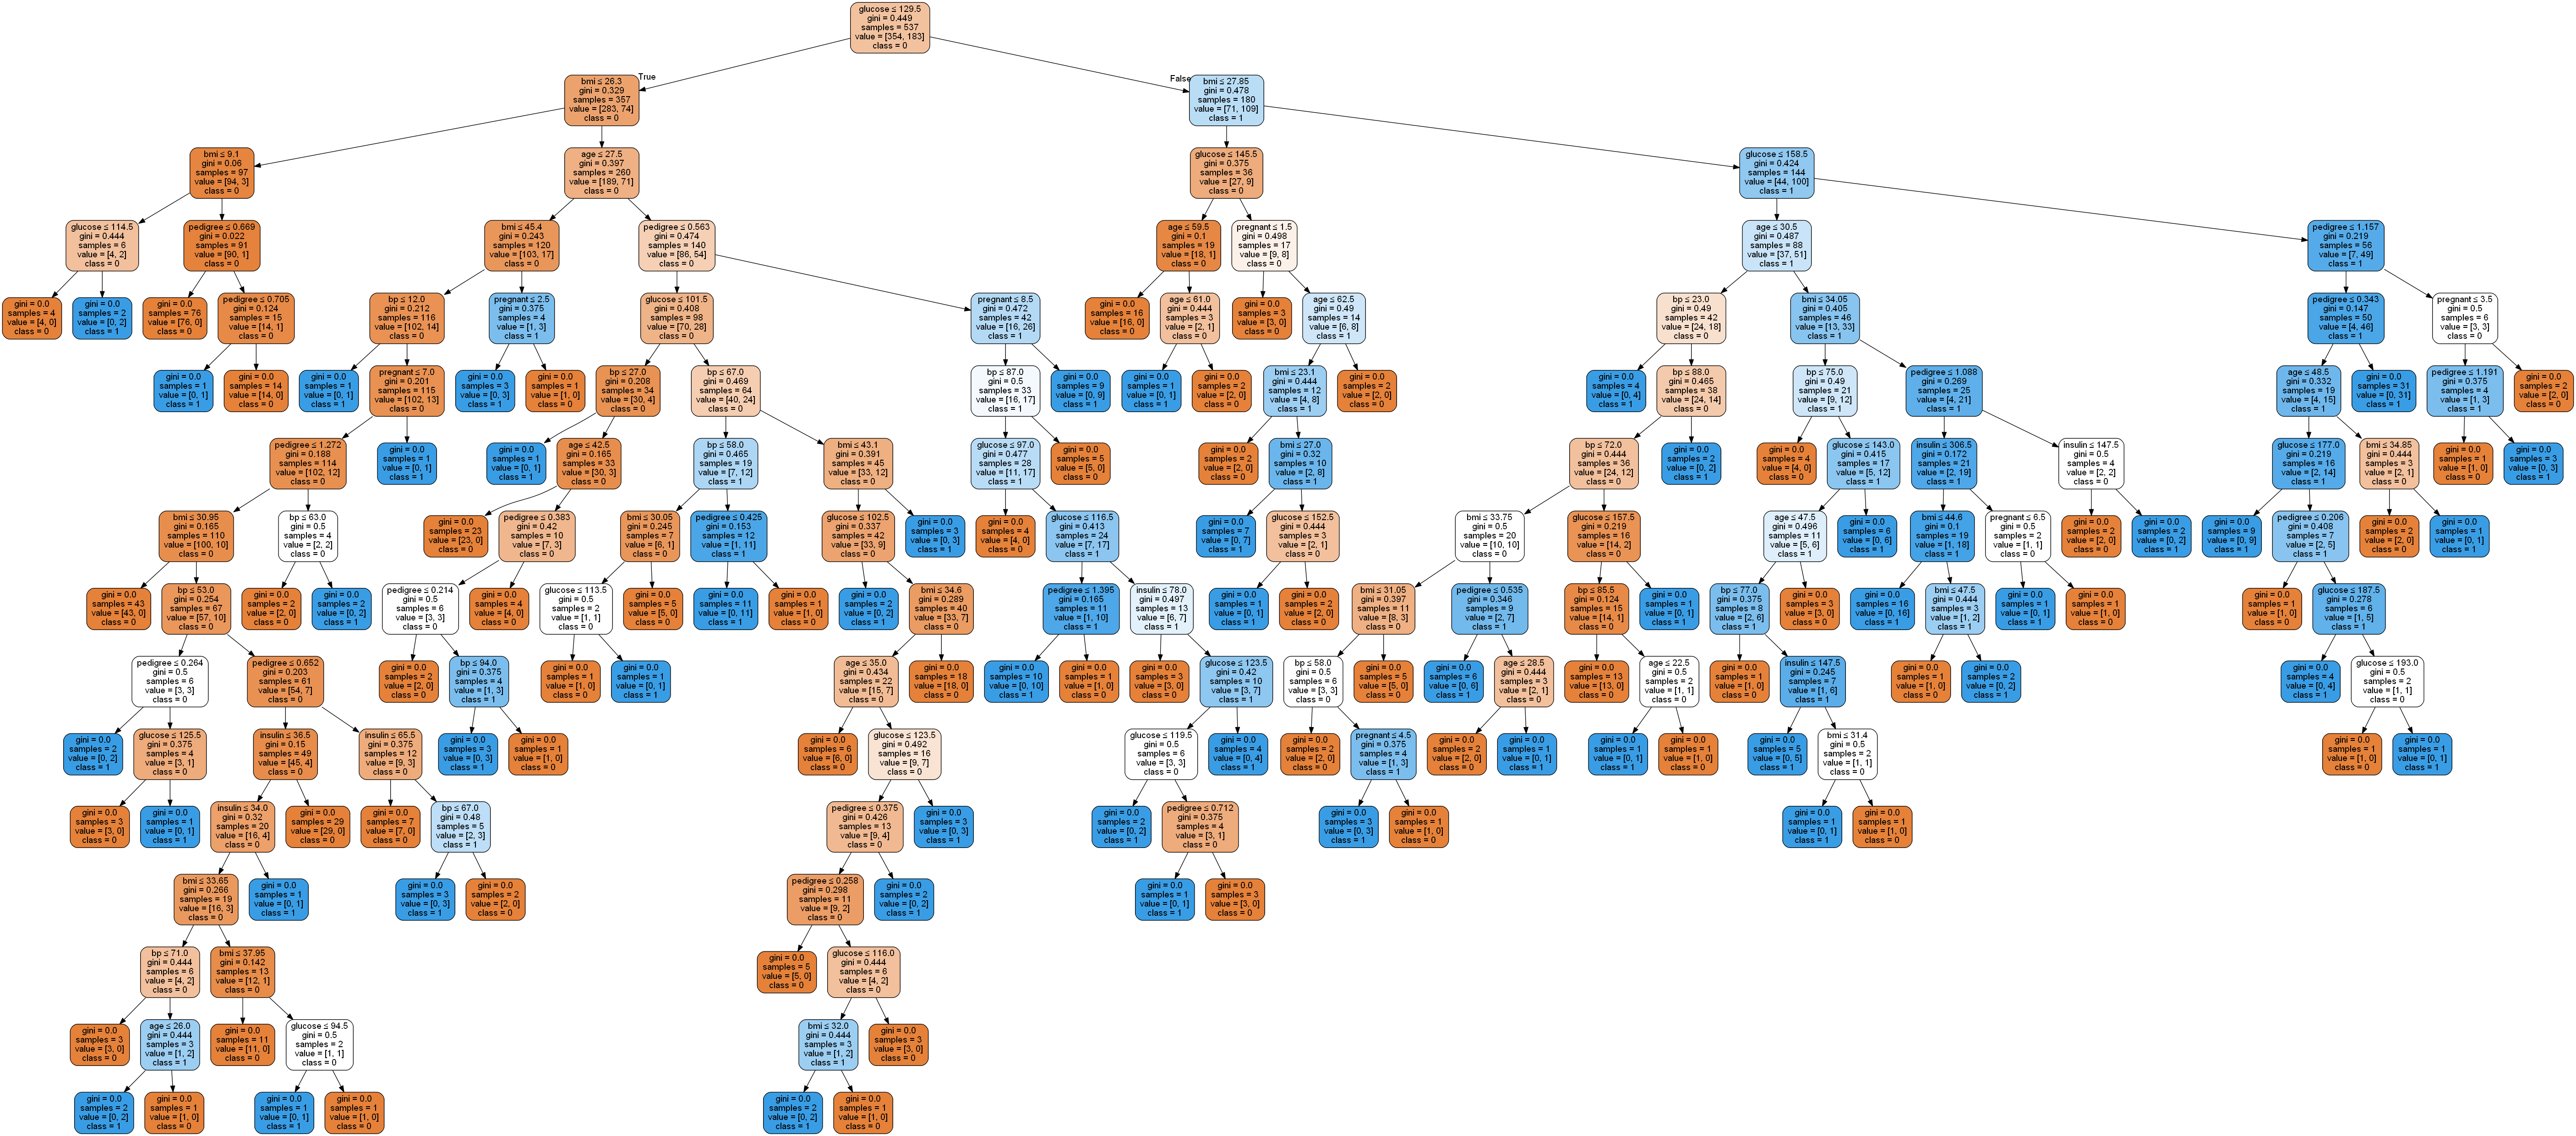

In [13]:
#Visualizing Decision Trees

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

The resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

#### Optimize Performance:
<ul>
    <li>criterion: Choose attribute selection measure: allows us to use the different-different attribute selection measure</li>
    <li>splitter: choose the split strategy.</li>
    <li>max_depth: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples.</li>
</ul>

#### Model with Information Gain

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


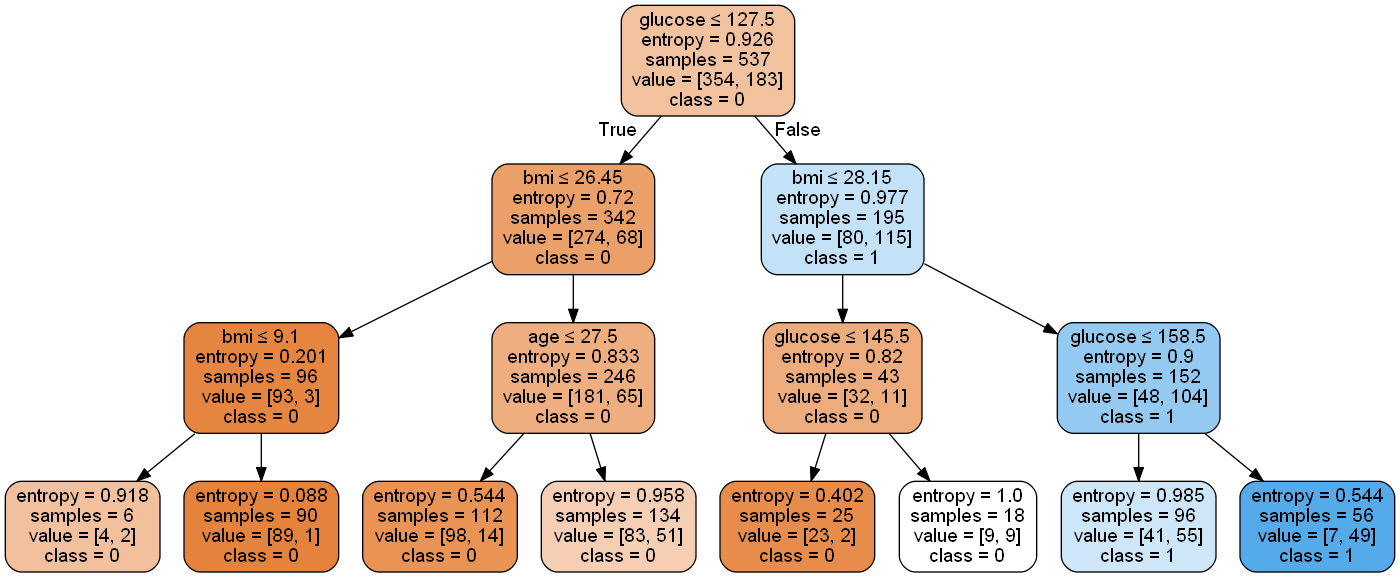

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

<b>Information Gain is more accurate than Gini Index due to it try to decrease the impurity score toward totally 0 mean that all of their leaf is 100% pure</b>